# Telling simple stories from data - Where to start?

Are you a data enthusiast? wondering where to start and how to start telling stories from data?. Though story telling is a art and demands more creativity, there are some common analysis which can be carried out with any data set. This article just helps you with those type of common analysis. 

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
from itertools import cycle, islice

### Look at your data
Its a very crucial part. You need to know and get a feel about the data. In this article we will looking at one day international cricket matches data. Each row in this data set is about the runs scored by a player in a particular match. Likewise we have data for scores of individual players frm all international players. 

In [25]:
data = pd.read_csv('/home/skathirmani/Desktop/datasets/odi-batting.csv')
data.head()
#data['run_rate'] = data['0']
#del data['0']
data['Player'] = data['Player'].fillna('NA')
data.head()

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118,97.52,2010-02-16,Tue,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110,99.09,2009-01-09,Tue,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100,138.88,2010-08-16,Mon,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82,75.92,2010-10-07,Sat,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57,100.00,2010-01-07,Thu,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


### Identify Dimension & Metrics

* Once you have a understanding about what is each row is all about, next we should classify the columns in the data. We can identify what the dimension and metrics in our data. Dimensions are those columns using which we can perform grouping operations. Like countr, state, geography, departments, school names, etch. 

* Then we should identify the metrics columns. Metrics are basically the numeric columns in our data. Like sales revenue numbers, product volume numbers, ages, marks etc.,

* Finally we should derive new metrics and dimensions from the existing column. For example we can derive age buckets from age column. And we can derive month, year, week number etc from date columns.

#### Dimesions
* Count of unique groups/items
* which group/item is appering frequently and its count

#### Metrics
* Mean, Standard Deviation, Min, Max etc.,
* Histogram of the metric column

#### Derive metrics and dimensions
* Date column: Year, month, day, day of the week, etc,
* Age: Age groups
* ...

In [26]:
numeric_cols = data._get_numeric_data().columns
dimensions = set(data.columns) - set(numeric_cols)
data['MatchDate'] = pd.to_datetime(data['MatchDate']) # To derive year, month, day of the week, day of the month etc
print 'Dimensions: ', dimensions
print 'Metric/Numeric Cols: ', numeric_cols

Dimensions:  set(['Versus', 'MatchDate', 'URL', 'Country', 'Player', 'Weekday', 'Ground'])
Metric/Numeric Cols:  Index([u'Runs', u'ScoreRate'], dtype='object')


### Summary of the data
Now that we know about what are the dimensions and metrics in our data, lets understand the values under each of these columns. `Pandas` has a very useful function called [describe()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) which gives a summary view of the data. By default it describes only the numberic columns. Pass `include=all` to add the description of all the columns.

From this functions I usually look for the following parameters
* For each dimension, how many groups are there and which group is appearing very frequently. For example the below table says that for the dimension column `Country`, the top country is `India`. And `Sachin R Tendular` is the player who is appearing very frequently appearing in the `Player` column.
* For each metric we can get an idea about the distribution of the columnby knowing the min, max and the percentile values.

In [3]:
data.describe(include='all')

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,URL,run_rate
count,55926,55926,55926.000000,55926,55926,55926,55926,55926,55926.000000
unique,22,1936,NaN,2757,7,178,25,3209,NaN
top,India,Sachin R Tendulkar,NaN,2007-04-02 00:00:00,Sun,Sharjah CA Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=1208,NaN
freq,6634,442,NaN,108,11427,3581,7216,22,NaN
first,NaN,NaN,NaN,1971-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.231073,NaN,NaN,NaN,NaN,NaN,65.283843
std,NaN,NaN,25.556919,NaN,NaN,NaN,NaN,NaN,44.225561
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,37.500000


#### Insight No: 1
From the above table I can get the following simple but useful insight
    `Sachin R Tendular` from `India` has played more matches compared to any other player. And likely that he has played more matches against `Australia` in `Sharja CA Stadium` that too mostly on `Sunday`

## Analyse Dimensions by just count
Start with dimensions. For each dimensions look at how frequently each group in that column is appearing. In the following bar chart it tells that next to `Sachin R Tendular`, it is `Sanath T Jayasuriya` who is appearing frequently in the data. Not just that, he is almost appearing as frequent as `Sachin R Tendulkar`. 

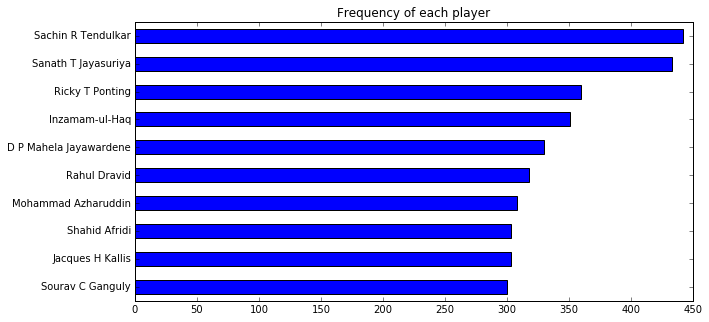

In [4]:
data['Player'].value_counts().head(10).sort_values().plot(kind='barh',
                                                          figsize=(10, 5),
                                                          title='Frequency of each player')

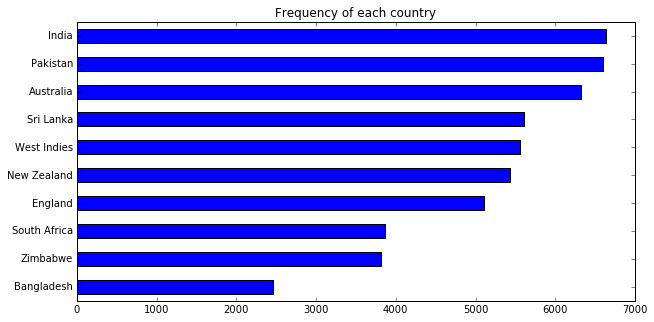

In [5]:
data['Country'].value_counts().head(10).sort_values().plot(kind='barh',
                                                           figsize=(10, 5),
                                                           title='Frequency of each country')

### Analyse Metrics

After analysing the frequency count in each dimensions, time to checkout the numeric columns using histograms. The following histograms tells that most of the runs are scored between 0-25 approximately. 

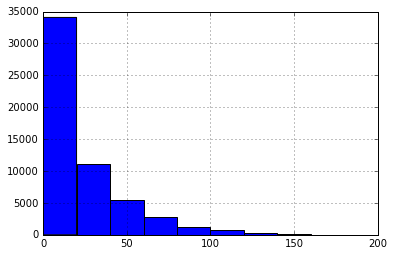

In [32]:
data['Runs'].hist()

### Create new dimensions
As said earlier, we create new dimensions from existing dimensions or metrics. For example from the date column we can derive many dimensions as follows and look at the frequency count under each of these dimensions

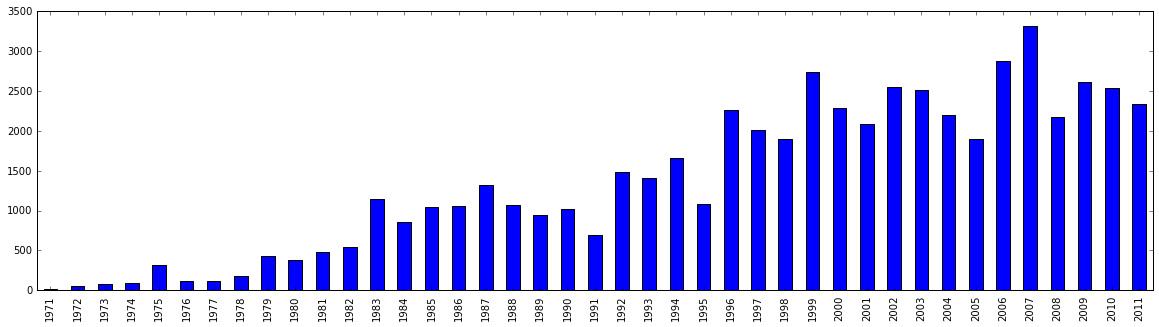

In [7]:
data['Year'] = data['MatchDate'].dt.year
plot_data = data['Year'].value_counts().sort_index()
my_colors = np.array(['b'] * len(plot_data))
#my_colors[[4, 8, 12, 16, 21, 25, 28, 32, 36]] = 'b'
plot_data.plot(kind='bar', figsize=(20, 5), color=my_colors)

#### Insight number: 2
* No. of matches are increasing year by year.
* There are some peaks in between. If we have domain knowlege, we can answer for the question "why are these peaks appearing?"
* If we closely observe, those are the years in which world cup was played
* Also after 2007, the number of odi matches started decreasing. Once again if we have domain knowledge, we can understand that this is because of the IPL matches.

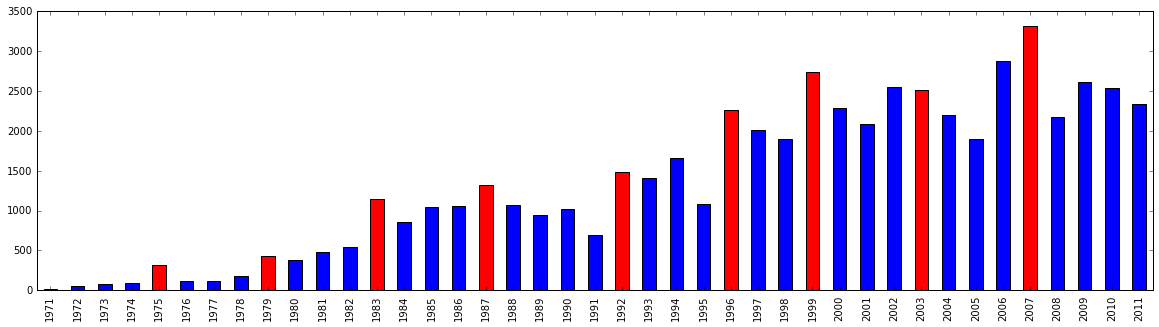

In [10]:
data['Year'] = data['MatchDate'].dt.year
plot_data = data['Year'].value_counts().sort_index()
my_colors = np.array(['b'] * len(plot_data))
my_colors[[4, 8, 12, 16, 21, 25, 28, 32, 36]] = 'r'
plot_data.plot(kind='bar', figsize=(20, 5), color=my_colors)

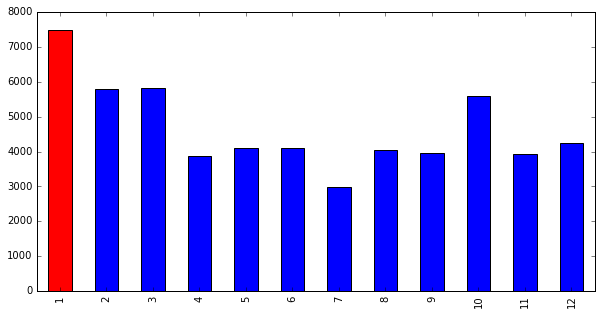

In [12]:
data['Month'] = data['MatchDate'].dt.month
plot_data = data['Month'].value_counts().sort_index()
my_colors = np.array(['b'] * len(plot_data))
my_colors[0] = 'r'
plot_data.plot(kind='bar', figsize=(10, 5), color=my_colors)

#### Insight No: 3
* Most of the matches have been played in January

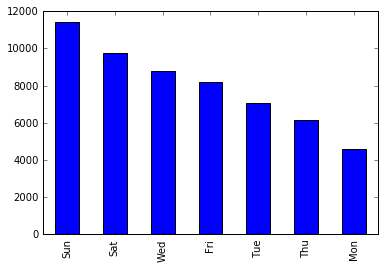

In [34]:
data['Weekday'].value_counts().plot(kind='bar') #Sunday seems to have more number of matches

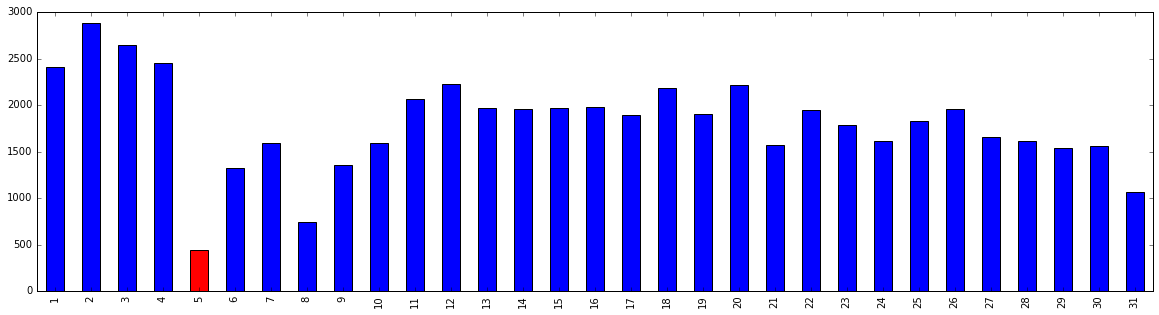

In [73]:
plot_data_day = data['MatchDate'].dt.day.value_counts().sort_index()
my_colors = ['b'] * len(plot_data_day)
my_colors[4] = 'r'
plot_data_day.plot(kind='bar', figsize=(20, 5), color=my_colors)

#### Insight No: 4
* For some reason, number of matches played on 5th of every month is very less

# To be Added
### Comparison
Once we have analysed the dimension and metrics, we can start analysing the multiple dimensions and metrics together

In [36]:
player = pd.DataFrame(data.groupby(['Player'])['Runs'].sum().sort_values(ascending=False))
player['Strike Rate'] = data.groupby(['Player'])['ScoreRate'].mean()
player.head(10)

,Runs,Strike Rate
Player,,
Sachin R Tendulkar,18111,74.612127
Ricky T Ponting,13686,69.831194
Sanath T Jayasuriya,13430,77.577506
Inzamam-ul-Haq,11739,67.453114
Jacques H Kallis,11372,63.600858
Sourav C Ganguly,11363,64.900433
Rahul Dravid,10889,66.911604
Brian C Lara,10405,70.718304
D P Mahela Jayawardene,9913,65.058697
